<a href="https://colab.research.google.com/github/igedemadepradnyaairlangga/Dataanalitycs/blob/master/klasifikasiteksMovieReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Klasifikasi Teks
- Nama: I Gede Made Pradnya Airlangga
- Email: pradnya.airlangga@gmail.com
- Id Dicoding: I Gede Made Pradnya Airlangga

Sumber Dataset : https://www.kaggle.com/datasets/atulanandjha/imdb-50k-movie-reviews-test-your-bert

## Menentukan Pertanyaan Bisnis

- Bagaimana distribusi antara sentimen positif dan negatif pada dataset? Apakah ada ketidakseimbangan yang signifikan?
- Apa kata-kata yang paling umum muncul dalam ulasan positif dan negatif? Adakah kata-kata kunci yang dapat diidentifikasi untuk setiap kategori sentimen?
- Apa kata-kata atau frasa umum yang sering muncul dalam ulasan positif/negatif?
- Apakah terdapat kelas sentimen tertentu yang cenderung sering dianggap sebagai kelas lain? Bagaimana kita dapat meningkatkan klasifikasi untuk kasus-kasus ini?

## Menghubungkan ke dataset yang ada di google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"
# /content/gdrive/My Drive/Kaggle is the path where kaggle.json is present in the Google Drive

In [3]:
#changing the working directory
%cd /content/gdrive/My Drive/Kaggle
#Check the present working directory using pwd command

/content/gdrive/My Drive/Kaggle


In [4]:
!ls

 0t08v9bAaA0mXGCQ.png		 Mall_Customers.csv
 alldata_1_for_kaggle.csv	 OdfDTwgPVdW9XbE7.png
 amazon_prime_titles.csv	 rockpaperscissors
 best_model.h5			 rock_paper_scissors_final_model.h5
 combined_dataset.csv		 rock_paper_scissors_model.h5
 day.csv			'Salinan amazon_prime_titles.csv'
'e-shop clothing 2008.csv'	 testkt.csv
'e-shop clothing 2008.csv.zip'	 train.csv
 hour.csv			 trainkt.csv
 kaggle.json			 udemy_output_All_Finance__Accounting_p1_p626.csv
 klasifikasiteks


## Menyaipkan semua library yang dibuthkan

In [156]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from wordcloud import WordCloud

## Data Wrangling

**Cleaning Trainkt Dataset**

In [6]:
# Path ke folder dataset di Google Drive
folder_path = '/content/drive/My Drive/Kaggle'
train_data = pd.read_csv('trainkt.csv')

# Menampilkan informasi awal dari DataFrame
print("Info:")
print(train_data.info())

print("\nHead:")
print(train_data.head())

print("\nColumns:")
print(train_data.columns)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None

Head:
                                                text sentiment
0  Now, I won't deny that when I purchased this o...       neg
1  The saddest thing about this "tribute" is that...       neg
2  Last night I decided to watch the prequel or s...       neg
3  I have to admit that i liked the first half of...       neg
4  I was not impressed about this film especially...       neg

Columns:
Index(['text', 'sentiment'], dtype='object')


In [7]:
# Cek dan hapus duplikat
train_data = train_data.drop_duplicates()

In [8]:
# Tangani nilai-nilai yang hilang jika diperlukan
train_data = train_data.dropna()

In [9]:
# Periksa Missing Values
missing_values = train_data.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
text         0
sentiment    0
dtype: int64


In [10]:
#Pembersihan Teks
#menghapus karakter khusus dan mengonversi teks ke huruf kecil)
train_data['text'] = train_data['text'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)

In [11]:
# Melihat hasil setelah pembersihan
print("Info setelah pembersihan:")
print(train_data.info())

Info setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24904 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       24904 non-null  object
 1   sentiment  24904 non-null  object
dtypes: object(2)
memory usage: 583.7+ KB
None


In [12]:
# Memilih 1000 data secara acak
train_data_sample = train_data.sample(n=1000, random_state=42)

In [13]:
# Menyimpan dataset yang telah dibersihkan dan diambil sampelnya
sampled_dataset_trainkt_path = '/content/drive/My Drive/Kaggle/sampled_dataset_trainkt.csv'

In [14]:
# Mengecek dan membuat direktori jika belum ada
output_directory = os.path.dirname(sampled_dataset_trainkt_path)
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [15]:
# Menyimpan data ke dalam file CSV
train_data_sample.to_csv(sampled_dataset_trainkt_path, index=False)

In [16]:
# Menampilkan informasi dataset yang telah dibersihkan dan diambil sampelnya
print("Info dataset yang telah dibersihkan dan diambil sampelnya:")
print(train_data_sample.info())

Info dataset yang telah dibersihkan dan diambil sampelnya:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12579 to 5857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB
None


**Cleaning Testkt Dataset**

In [17]:
# Path ke folder dataset di Google Drive
folder_path = '/content/drive/My Drive/Kaggle'
test_data = pd.read_csv('testkt.csv')

# Menampilkan informasi awal dari DataFrame
print("Info:")
print(test_data.info())

print("\nHead:")
print(test_data.head())

print("\nColumns:")
print(test_data.columns)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       25000 non-null  object
 1   sentiment  25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB
None

Head:
                                                text sentiment
0  My daughter liked it but I was aghast, that a ...       neg
1  I... No words. No words can describe this. I w...       neg
2  this film is basically a poor take on the old ...       neg
3  This is a terrible movie, and I'm not even sur...       neg
4  First of all this movie is a piece of reality ...       pos

Columns:
Index(['text', 'sentiment'], dtype='object')


In [18]:
# Cek dan hapus duplikat
test_data = test_data.drop_duplicates()

In [19]:
# Tangani nilai-nilai yang hilang jika diperlukan
test_data = test_data.dropna()

In [20]:
# Periksa Missing Values
missing_values = test_data.isnull().sum()
print("Jumlah Missing Values per Kolom:")
print(missing_values)

Jumlah Missing Values per Kolom:
text         0
sentiment    0
dtype: int64


In [21]:
#Pembersihan Teks
#menghapus karakter khusus dan mengonversi teks ke huruf kecil)
test_data['text'] = test_data['text'].str.lower().replace('[^a-zA-Z0-9\s]', '', regex=True)

In [22]:
# Melihat hasil setelah pembersihan
print("Info setelah pembersihan:")
print(test_data.info())

Info setelah pembersihan:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24801 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       24801 non-null  object
 1   sentiment  24801 non-null  object
dtypes: object(2)
memory usage: 581.3+ KB
None


In [23]:
# Memilih 1000 data secara acak
test_data_sample = test_data.sample(n=1000, random_state=42)

In [24]:
# Menyimpan dataset yang telah dibersihkan dan diambil sampelnya
sampled_dataset_testkt_path = '/content/drive/My Drive/Kaggle/sampled_dataset_testkt.csv'

In [25]:
# Mengecek dan membuat direktori jika belum ada
output_directory = os.path.dirname(sampled_dataset_testkt_path)
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

In [26]:
# Menyimpan data ke dalam file CSV
test_data_sample.to_csv(sampled_dataset_testkt_path, index=False)

In [27]:
# Menampilkan informasi dataset yang telah dibersihkan dan diambil sampelnya
print("Info dataset yang telah dibersihkan dan diambil sampelnya:")
print(train_data_sample.info())

Info dataset yang telah dibersihkan dan diambil sampelnya:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 12579 to 5857
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB
None


##**Membuat Model Sequential dengan LSTM dan Embedding:**

In [28]:
# Membaca dataset train yang sudah dibersihkan
train_data = pd.read_csv('/content/drive/My Drive/Kaggle/sampled_dataset_trainkt.csv')

In [48]:
# Definisi vocab_size dan oov_tok
vocab_size = 1000
oov_tok = "<OOV>"

In [49]:
# Menampilkan informasi awal dari DataFrame
print("Info:")
print(train_data.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB
None


In [51]:
# Membagi dataset menjadi data pelatihan dan validasi
train_set, validation_set = train_test_split(train_data_sample, test_size=0.2, random_state=42)

In [53]:
# Mengonversi label sentiment ke nilai biner
train_set['sentiment'] = train_set['sentiment'].map({'pos': 1, 'neg': 0})
validation_set['sentiment'] = validation_set['sentiment'].map({'pos': 1, 'neg': 0})

In [33]:
# Menggunakan GPU jika tersedia
physical_devices = tf.config.list_physical_devices('GPU')
if len(physical_devices) > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [34]:
# Menampilkan informasi dataset
print("Jumlah data pelatihan:", len(train_set))
print("Jumlah data validasi:", len(validation_set))

Jumlah data pelatihan: 800
Jumlah data validasi: 200


**Tokenisasi dan Padding:**

In [84]:
# Inisialisasi tokenizer
tokenizer = Tokenizer(num_words=1000, oov_token='<oov>')

In [89]:
# Mengonversi teks ke dalam sequence
train_sequences = tokenizer.texts_to_sequences(train_set['text'])
validation_sequences = tokenizer.texts_to_sequences(validation_set['text'])

In [38]:
# Library Tambahan seperti NLTK
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [91]:
# Padding sequence agar memiliki panjang yang sama
max_length = max(len(seq) for seq in train_sequences)
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding='post', truncating='post')
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding='post', truncating='post')

In [92]:
# Inisialisasi model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=128, input_length=max_length))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.3))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [94]:
# Compile model
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
# Menambahkan early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [96]:
# Menampilkan struktur model
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 2469, 128)         2378624   
                                                                 
 lstm_5 (LSTM)               (None, 128)               131584    
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_9 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                 65        
                                                                 
Total params: 2518529 (9.61 MB)
Trainable params: 2518

In [97]:
# Melatih model
history = model.fit(
    train_padded,
    train_set['sentiment'],
    epochs=20,
    validation_data=(validation_padded, validation_set['sentiment']),
    callbacks=[early_stopping]
)

Epoch 1/20
25/25 [==============================] - 113s 4s/step - loss: 0.6936 - accuracy: 0.4787 - val_loss: 0.6933 - val_accuracy: 0.4950
Epoch 2/20
25/25 [==============================] - 110s 4s/step - loss: 0.6934 - accuracy: 0.5125 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 3/20
25/25 [==============================] - 119s 5s/step - loss: 0.6938 - accuracy: 0.5138 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 4/20
25/25 [==============================] - 115s 5s/step - loss: 0.6930 - accuracy: 0.5163 - val_loss: 0.6932 - val_accuracy: 0.4950
Epoch 5/20
25/25 [==============================] - 115s 5s/step - loss: 0.6921 - accuracy: 0.5263 - val_loss: 0.6931 - val_accuracy: 0.4950
Epoch 6/20
25/25 [==============================] - 116s 5s/step - loss: 0.6938 - accuracy: 0.4888 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 7/20
25/25 [==============================] - 116s 5s/step - loss: 0.6943 - accuracy: 0.4712 - val_loss: 0.6931 - val_accuracy: 0.5050
Epoch 8/20
25

In [98]:
# Evaluasi model
accuracy_train = model.evaluate(train_padded, train_set['sentiment'])[1]
accuracy_validation = model.evaluate(validation_padded, validation_set['sentiment'])[1]

print(f"Akurasi pada data pelatihan: {accuracy_train*100:.2f}%")
print(f"Akurasi pada data validasi: {accuracy_validation*100:.2f}%")

7/7 [==============================] - 4s 551ms/step - loss: 0.6931 - accuracy: 0.5050
Akurasi pada data pelatihan: 49.88%
Akurasi pada data validasi: 50.50%


In [101]:
# Evaluasi dengan metrik alternatif
predictions = model.predict(validation_padded)
predictions_binary = (predictions > 0.5).astype(int)

precision = precision_score(validation_set['sentiment'], predictions_binary)
recall = recall_score(validation_set['sentiment'], predictions_binary)
f1 = f1_score(validation_set['sentiment'], predictions_binary)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

7/7 [==============================] - 4s 601ms/step
Precision: 0.505
Recall: 1.0
F1 Score: 0.6710963455149502


In [105]:
accuracy_train = model.evaluate(train_padded, train_set['sentiment'])[1]
accuracy_validation = model.evaluate(validation_padded, validation_set['sentiment'])[1]

print(f"Akurasi pada data pelatihan: {accuracy_train*100:.2f}%")
print(f"Akurasi pada data validasi: {accuracy_validation*100:.2f}%")

7/7 [==============================] - 5s 816ms/step - loss: 0.6931 - accuracy: 0.5050
Akurasi pada data pelatihan: 49.88%
Akurasi pada data validasi: 50.50%


In [109]:
# Tentukan ambang batas
threshold = 0.4  # Atur sesuai kebutuhan

In [110]:
# Prediksi pada data validasi
validation_probabilities = model.predict(validation_padded)
validation_predictions = (validation_probabilities > threshold).astype(int)

7/7 [==============================] - 4s 608ms/step


In [111]:
# Menampilkan classification report
print("Classification Report:")
print(classification_report(validation_set['sentiment'], validation_predictions))

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        99
           1       0.51      1.00      0.67       101

    accuracy                           0.51       200
   macro avg       0.25      0.50      0.34       200
weighted avg       0.26      0.51      0.34       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
# Cek distribusi kelas
class_distribution = train_set['sentiment'].value_counts()
print(class_distribution)

1    400
0    400
Name: sentiment, dtype: int64


In [114]:
# Inisialisasi RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [115]:
# Oversampling pada data pelatihan
X_resampled, y_resampled = ros.fit_resample(train_padded, train_set['sentiment'])

In [117]:
# Inisialisasi variabel yang dibutuhkan
embedding_dim = 64  # Sesuaikan dengan nilai yang sesuai
max_length = max(len(seq) for seq in X_resampled)  # Menggunakan X_resampled setelah oversampling

In [121]:
# Buat model kembali
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length))
model.add(LSTM(84, dropout=0.2, recurrent_dropout=0.2))  # Ubah nilai dropout di sini
model.add(Dense(1, activation='sigmoid'))
model.add(Dropout(0.5))  # Ubah nilai dropout di sini

In [122]:
# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [123]:
# Melatih model dengan data yang sudah di-oversampling
history = model.fit(X_resampled, y_resampled, epochs=10, validation_data=(validation_padded, validation_set['sentiment']))

Epoch 1/10
25/25 [==============================] - 65s 3s/step - loss: 4.4399 - accuracy: 0.4913 - val_loss: 0.7787 - val_accuracy: 0.4950
Epoch 2/10
25/25 [==============================] - 62s 2s/step - loss: 4.2501 - accuracy: 0.4700 - val_loss: 0.8208 - val_accuracy: 0.4950
Epoch 3/10
25/25 [==============================] - 60s 2s/step - loss: 4.5493 - accuracy: 0.4950 - val_loss: 0.9153 - val_accuracy: 0.4950
Epoch 4/10
25/25 [==============================] - 61s 2s/step - loss: 4.4502 - accuracy: 0.4638 - val_loss: 0.8689 - val_accuracy: 0.4950
Epoch 5/10
25/25 [==============================] - 61s 2s/step - loss: 4.3642 - accuracy: 0.4825 - val_loss: 0.8461 - val_accuracy: 0.4950
Epoch 6/10
25/25 [==============================] - 60s 2s/step - loss: 4.5145 - accuracy: 0.4837 - val_loss: 0.8437 - val_accuracy: 0.4950
Epoch 7/10
25/25 [==============================] - 62s 2s/step - loss: 4.1423 - accuracy: 0.4750 - val_loss: 0.8438 - val_accuracy: 0.4950
Epoch 8/10
25/25 [==

In [127]:
# Evaluasi model
accuracy_train = model.evaluate(X_resampled, y_resampled)[1]
accuracy_validation = model.evaluate(validation_padded, validation_set['sentiment'])[1]

print(f"Akurasi pada data pelatihan: {accuracy_train*100:.2f}%")
print(f"Akurasi pada data validasi: {accuracy_validation*100:.2f}%")
plt.show()

7/7 [==============================] - 2s 304ms/step - loss: 0.8096 - accuracy: 0.4950
Akurasi pada data pelatihan: 50.13%
Akurasi pada data validasi: 49.50%


#**Bagaimana distribusi antara sentimen positif dan negatif pada dataset? Apakah ada ketidakseimbangan yang signifikan?**

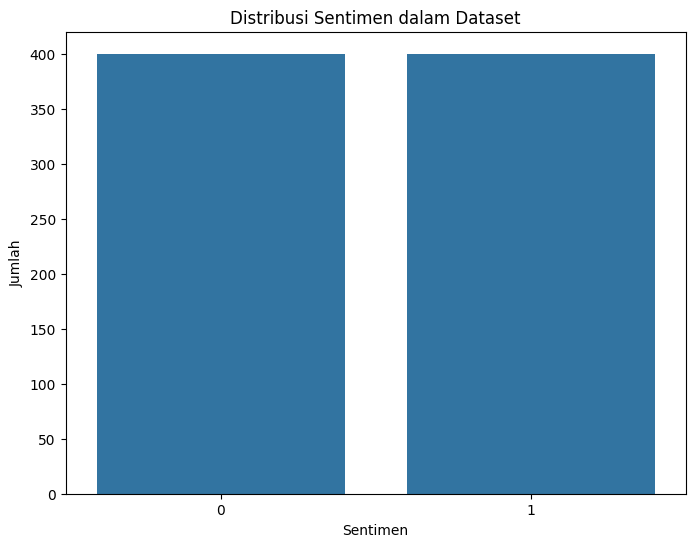

Persentase Sentimen Positif: 50.00%
Persentase Sentimen Negatif: 50.00%


In [132]:
# Menghitung distribusi sentimen
sentiment_distribution = train_set['sentiment'].value_counts()

# Menampilkan distribusi dengan plot
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=train_set)
plt.title('Distribusi Sentimen dalam Dataset')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.show()

# Menampilkan persentase distribusi
total_data = len(train_set)
percentage_positive = (sentiment_distribution[1] / total_data) * 100
percentage_negative = (sentiment_distribution[0] / total_data) * 100

print(f'Persentase Sentimen Positif: {percentage_positive:.2f}%')
print(f'Persentase Sentimen Negatif: {percentage_negative:.2f}%')


#**Apa kata-kata yang paling umum muncul dalam ulasan positif dan negatif? Adakah kata-kata kunci yang dapat diidentifikasi untuk setiap kategori sentimen?**

In [145]:
# Membaca dataset train yang sudah dibersihkan
train_data = pd.read_csv('/content/drive/My Drive/Kaggle/sampled_dataset_trainkt.csv')

# Membagi dataset menjadi data pelatihan dan validasi
train_set, validation_set = train_test_split(train_data, test_size=0.2, random_state=42)

# Menyiapkan teks dan label
X_train = train_set['text']
y_train = train_set['sentiment']
X_val = validation_set['text']
y_val = validation_set['sentiment']

# Inisialisasi CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')

# Ubah teks menjadi representasi vektor
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)

# Menerapkan model klasifikasi (Contoh: Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Melakukan prediksi pada data validasi
y_pred = model.predict(X_val_vectorized)

# Evaluasi model
print("Accuracy:", accuracy_score(y_val, y_pred))
print("\nClassification Report:")
print(classification_report(y_val, y_pred))

Accuracy: 0.75

Classification Report:
              precision    recall  f1-score   support

         neg       0.72      0.80      0.76        99
         pos       0.78      0.70      0.74       101

    accuracy                           0.75       200
   macro avg       0.75      0.75      0.75       200
weighted avg       0.75      0.75      0.75       200



In [147]:
# Inisialisasi CountVectorizer untuk menghitung frekuensi kata
vectorizer = CountVectorizer(stop_words='english')

# Ubah teks menjadi representasi vektor
X_train_vectorized = vectorizer.fit_transform(X_train)
X_val_vectorized = vectorizer.transform(X_val)

# Menerapkan model klasifikasi (Contoh: Naive Bayes)
model = MultinomialNB()
model.fit(X_train_vectorized, y_train)

# Menampilkan kata-kata paling umum dalam ulasan POSITIF dan NEGATIF
df_positive = pd.DataFrame(data=model.feature_log_prob_[1], index=vectorizer.get_feature_names_out(), columns=['log_probability'])
df_negative = pd.DataFrame(data=model.feature_log_prob_[0], index=vectorizer.get_feature_names_out(), columns=['log_probability'])

# Kata-kata paling umum dalam ulasan POSITIF
print("Kata-kata paling umum dalam ulasan POSITIF:")
print(df_positive.sort_values(by='log_probability', ascending=False).head(10))

# Kata-kata paling umum dalam ulasan NEGATIF
print("\nKata-kata paling umum dalam ulasan NEGATIF:")
print(df_negative.sort_values(by='log_probability', ascending=False).head(10))


Kata-kata paling umum dalam ulasan POSITIF:
        log_probability
br            -4.263652
film          -4.520483
movie         -4.854615
like          -5.448556
good          -5.452266
great         -5.667080
just          -5.723968
story         -5.794704
time          -5.826622
really        -5.959381

Kata-kata paling umum dalam ulasan NEGATIF:
        log_probability
br            -4.226229
movie         -4.502788
film          -4.543426
like          -5.187124
just          -5.210794
good          -5.541296
bad           -5.566614
really        -5.840152
time          -5.857149
people        -5.928185


#**Apa tujuan bisnis dari analisis sentimen pada dataset ini? Apakah tujuannya untuk meningkatkan pemahaman pelanggan, mendukung pengambilan keputusan produk, atau tujuan lainnya?"**

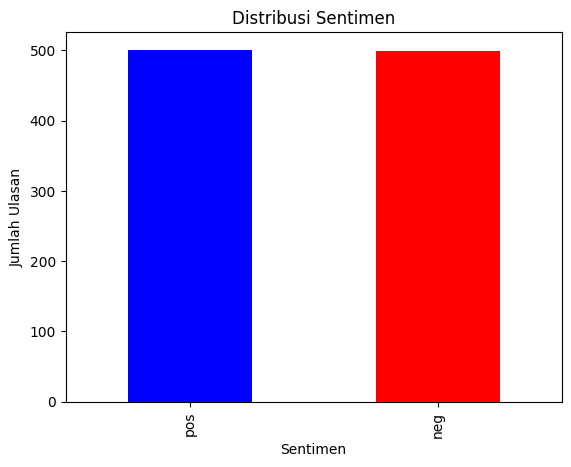

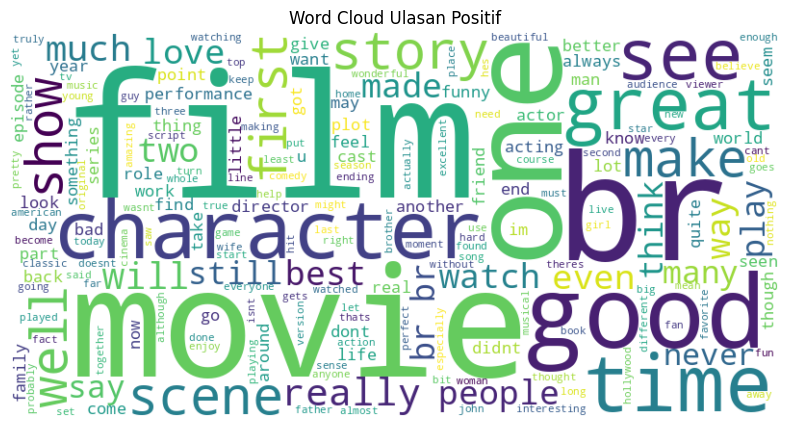

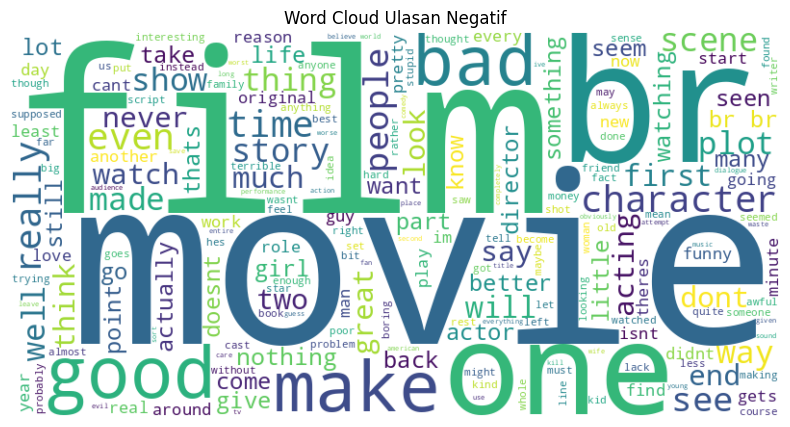

In [157]:
# Visualisasi distribusi sentimen
sentiment_distribution.plot(kind='bar', color=['blue', 'red'])
plt.title('Distribusi Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah Ulasan')
plt.show()

# Membuat Word Cloud untuk ulasan positif
positive_reviews = train_data[train_data['sentiment'] == 'pos']['text'].values
positive_text = ' '.join(positive_reviews)

wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Positif')
plt.show()

# Membuat Word Cloud untuk ulasan negatif
negative_reviews = train_data[train_data['sentiment'] == 'neg']['text'].values
negative_text = ' '.join(negative_reviews)

wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud Ulasan Negatif')
plt.show()

<ipython-input-160-6fccf884e1ae>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='genre', data=df, palette='viridis')


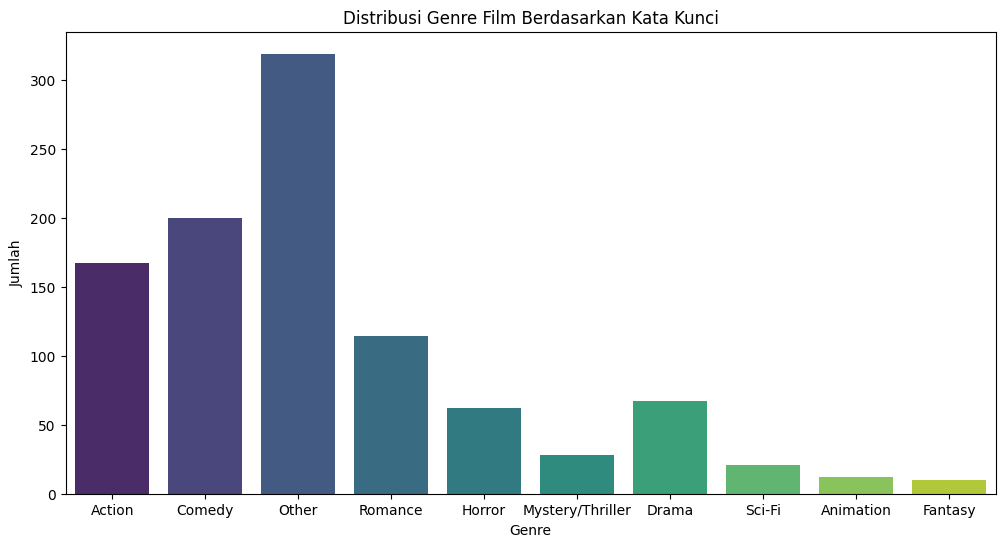

In [160]:
# Membaca dataset
df = pd.read_csv('/content/drive/My Drive/Kaggle/sampled_dataset_trainkt.csv')

# Definisi kata kunci untuk masing-masing genre
genres_keywords = {
    'Action': ['action', 'thrilling', 'adventure', 'exciting', 'intense'],
    'Comedy': ['comedy', 'hilarious', 'funny', 'laughter', 'humor'],
    'Drama': ['drama', 'emotional', 'intense', 'gripping', 'heartfelt'],
    'Horror': ['horror', 'scary', 'terrifying', 'suspenseful', 'chilling'],
    'Sci-Fi': ['sci-fi', 'futuristic', 'space', 'technology', 'extraterrestrial'],
    'Romance': ['romance', 'love', 'romantic', 'heartwarming', 'emotional'],
    'Mystery/Thriller': ['mystery', 'thriller', 'suspense', 'mysterious', 'intriguing'],
    'Fantasy': ['fantasy', 'magical', 'otherworldly', 'enchanting', 'mythical'],
    'Animation': ['animation', 'animated', 'cartoon', 'vibrant', 'colorful']
}

# Fungsi untuk mengklasifikasikan teks ke dalam genre berdasarkan kata kunci
def classify_genre(text):
    for genre, keywords in genres_keywords.items():
        if any(keyword in text.lower() for keyword in keywords):
            return genre
    return 'Other'  # Jika tidak sesuai dengan genre apa pun

# Menambahkan kolom genre ke DataFrame
df['genre'] = df['text'].apply(classify_genre)

# Visualisasi
plt.figure(figsize=(12, 6))
sns.countplot(x='genre', data=df, palette='viridis')
plt.title('Distribusi Genre Film Berdasarkan Kata Kunci')
plt.xlabel('Genre')
plt.ylabel('Jumlah')
plt.show()